# Aim: Implement K-NN on Iris dataset and evaluate its performance.

# SKLearn
## 25/7/24

 # KNN

## Iris

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [131]:
df = pd.read_csv('Iris.csv')

In [132]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [134]:
df.shape

(150, 6)

In [135]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [137]:
from sklearn.datasets import load_iris

In [138]:
iris_sklearn = load_iris()

In [139]:
iris_df = pd.DataFrame(data = iris_sklearn.data, columns = iris_sklearn.feature_names)

In [140]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [141]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [142]:
data = load_iris()
# Extracting Attributes / Features
x = data.data

# Extracting Target / Class Labels
y = data.target

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [146]:
y_pred = knn.predict(x_test)

In [147]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [148]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=knn.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.9714285714285714
Test data accuracy: 0.9777777777777777


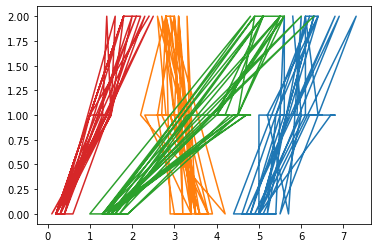

In [149]:
plt.plot(x_test,y_pred)

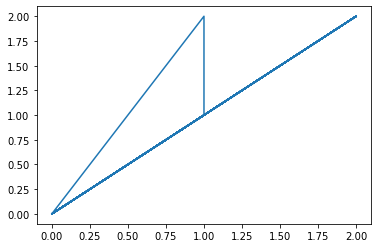

In [150]:
plt.plot(y_test,y_pred)

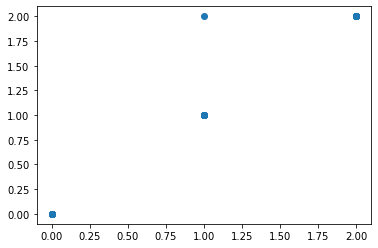

In [151]:
plt.scatter(y_test,y_pred)

In [152]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [153]:
cm1 = confusion_matrix(y_train, knn.predict(x_train))
print(cm1)

[[34  0  0]
 [ 0 30  2]
 [ 0  1 38]]


In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

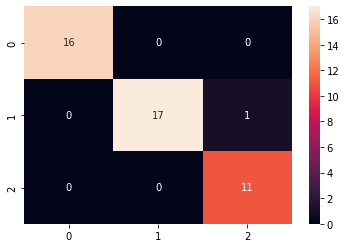

In [155]:
sns.heatmap(cm,annot = True)
#sns.set_figure(12,7)

<AxesSubplot:>

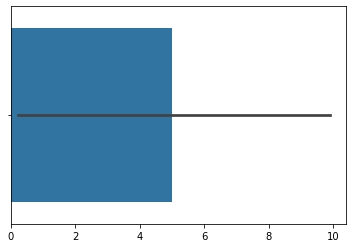

In [156]:
sns.barplot(cm)